# Notebook Imports

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
import seaborn as sns

# from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = '/content/drive/MyDrive/Machine Learning /Naive Bayes Spam Filter/SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '/content/drive/MyDrive/Machine Learning /Naive Bayes Spam Filter/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = '/content/drive/MyDrive/Machine Learning /Naive Bayes Spam Filter/SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX = '/content/drive/MyDrive/Machine Learning /Naive Bayes Spam Filter/SpamData/03_Testing/test-features.txt'
TEST_TARGET_MATRIX = '/content/drive/MyDrive/Machine Learning /Naive Bayes Spam Filter/SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [4]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_MATRIX, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [5]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [6]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [7]:
prob_token_spam

array([0.01059678, 0.00489925, 0.00722626, ..., 0.00014609, 0.00014609,
       0.00014087])

In [8]:
prob_token_ham

array([2.16227307e-02, 1.04246815e-02, 8.00593441e-03, ...,
       3.15660302e-05, 2.76202764e-05, 7.89150755e-06])

In [9]:
prob_token_all

array([1.69679552e-02, 8.08858583e-03, 7.71126912e-03, ...,
       7.90783531e-05, 7.68189716e-05, 6.32626825e-05])

# Calculating the Joint Probability



## The Dot Product

In [10]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [11]:
a.shape

(3,)

In [12]:
a.dot(b)

22

In [13]:
X_test.shape

(1722, 2500)

In [14]:
prob_token_spam.shape

(2500,)

In [15]:
X_test.shape

(1722, 2500)

In [16]:
prob_token_spam.shape

(2500,)

In [17]:
print('shape of dot product is', X_test.dot(prob_token_spam).shape)

shape of dot product is (1722,)


## Set the Prior Probability: Spam

$$P(Spam \, | \, X) = \frac{P(X \, | Spam) \,  P(Spam)} {P(X)}$$

In [18]:
# we acquired this is in our training file
PROB_SPAM = 0.3116 
PROB_HAM = 1 - PROB_SPAM

In [19]:
# we will use log likelihoods

log_likelihood_token_spam = np.log(prob_token_spam)
log_likelihood_token_ham = np.log(prob_token_ham)
log_likelihood_token_all = np.log(prob_token_all)

In [20]:
log_likelihood_token_spam[:5]

array([-4.54720512, -5.3186732 , -4.93003326, -4.52432751, -5.03820559])

## Joint Probability in log format

In [21]:
# LL = Log Likelihood

# joint probability of spam email = 
# (dot product of X_test and (LL of token|spam - LL of token|all emails)) + LL(Spam|All emails)

# we are subtracting instead of dividing because we are dealing with logs 

joint_log_spam = X_test.dot(log_likelihood_token_spam - log_likelihood_token_all) + np.log(PROB_SPAM)

In [22]:
joint_log_spam[-5:]

array([-48.08690204, -28.36239122, -51.0740788 , -20.55752551,
       -60.93471861])

In [23]:
joint_log_spam.shape

(1722,)

## Set the Prior Probability: Non-Spam

$$P(Ham \, | \, X) = \frac{P(X \, | Ham) \,  P(Ham)} {P(X)}$$

In [24]:
joint_log_ham = X_test.dot(log_likelihood_token_ham - log_likelihood_token_all) + np.log(PROB_HAM)

In [25]:
joint_log_ham[:5]

array([-39.87061549, -29.15965783, -40.09390282, -54.59701313,
       -20.36508192])

In [26]:
joint_log_ham.size

1722

In [27]:
joint_log_ham.shape

(1722,)

# Making Predictions 

## Checking for the higher Joint Probability

$$P(Spam \, | \, X) > P(Ham \, | \, X)$$
<center>OR<center>

$$P(Spam \, | \, X) < P(Ham \, | \, X)$$

Create a vector of predictions ($\hat y$)

Spam = 1
<br>
Non-Spam = 0

In [28]:

# prediction[i] = True 
#    if log_spam > log_ham

# prediction[i] = False 
#    if log_spam < log_ham
prediction = joint_log_spam > joint_log_ham

In [29]:
prediction[-5:]

array([False, False, False, False, False])

In [30]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

Simplify our expressions

Recall: We are subtracting instead of dividing because we took the log probabities

joint_log_spam = X_test.dot(log_likelihood_token_spam - log_likelihood_token_all) + np.log(PROB_SPAM)

is equivalent to the naive bayes equation


we can simplify our expression by removing the likelihood of a token occuring given all words(log_likelihood_token_all) as the probability of an email being spam or not spam doesn't depend on it.

In [31]:
# joint_log_spam = X_test.dot(log_likelihood_token_spam) + np.log(PROB_SPAM)
# joint_log_ham = X_test.dot(log_likelihood_token_ham) + np.log(PROB_HAM)

# Metrics and Accuracy

## Accuracy 

In [32]:
# sum up all our correct predictions

# correct predictins are where y_test is equal to our predictions

correct_pred = (y_test == prediction).sum()
incorrect_pred = (y_test != prediction).sum()

total_emails = X_test.shape[0]
accuracy = correct_pred / total_emails

In [33]:
print("The number of correct predictions are: ", correct_pred)
print("The number of incorrect predictions are: ", incorrect_pred)
print("Accuracy of Naive Bayes Classifier is: {:.2%}".format(accuracy))

The number of correct predictions are:  1678
The number of incorrect predictions are:  44
Accuracy of Naive Bayes Classifier is: 97.44%


Warning! Accuracy is inutuitive and easy to understand but for an imbalanced data set, it may give us a misleadingly high number. To verify the quality or our results we will visualize our results as well as use other metrics such as Recall, Precision, and F score.

# Visualizing Our Results

In [63]:
# Chart Styling Info 

xaxis_label = 'P(X|Nonspam)'
yaxis_label = 'P(X|Spam)'

linedata = np.linspace(start=-175, stop=25, num=1000)

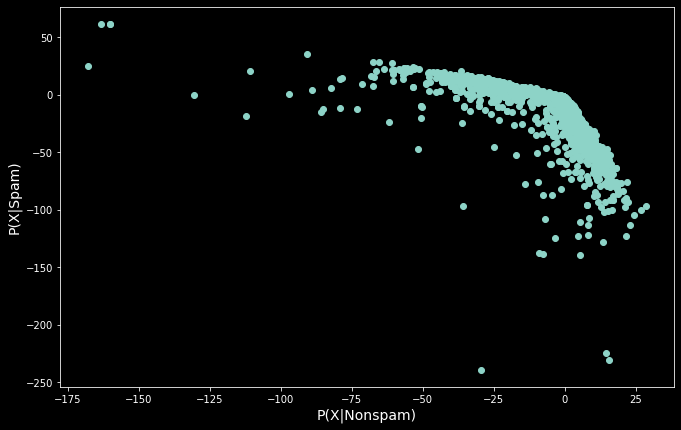

In [42]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale for x and y axis
# plt.xlim([-1000, 1000])
# plt.ylim([-1000, 1000])
plt.scatter(joint_log_ham, joint_log_spam)

plt.style.use('dark_background')


plt.show()

In [50]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame(
    {yaxis_label: joint_log_spam,
     xaxis_label: joint_log_ham,
     labels: y_test}
)

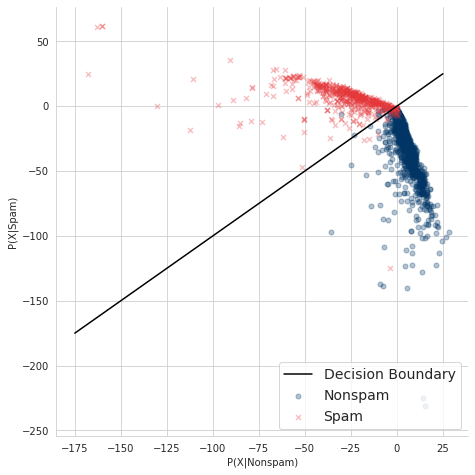

In [99]:
# plt.figure(figsize=(16, 10))
custom_colors = ['#003566', '#e5383b']
sns.lmplot(x=xaxis_label,
           y=yaxis_label,
           data=summary_df,
           height=6.5,
           fit_reg=False,
           legend=False,
           scatter_kws={'alpha': 0.3, 's': 25},
           hue=labels,
           markers=['o', 'x'],
           palette=custom_colors)

# plt.xlim([-1000, 1])
# plt.ylim([-1000, 1])
plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'),
           loc='lower right',
           fontsize=14)
plt.show()

# False Positives and False Negatives

In [ ]:
'''
FP: spam classifier classifies email as spam but is non-spam
FN: spam classifier classifies email as non-spam but is spam
'''

In [75]:
# return counts of spam classified and non-spam classifed
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1155,  567]))

In [82]:
# bitwise operator: &

# allows to compare element by element

true_pos = (y_test == 1) & (prediction == 1) 


In [83]:
true_pos.sum() # number of actual true spam emails

555

In [87]:
# number of emails that were actually spam but were classified non-spam
false_pos = (y_test == 0) & (prediction == 1)  

In [88]:
false_pos.sum() 

12

In [89]:
# number of emails that are non-spam and were classified as non-spam correctly
true_neg = (y_test == 0) & (prediction == 0)  

In [90]:
true_neg.sum()

1123

In [91]:
# number of emails that were actually non-spam but were classified as spam
false_neg = (y_test == 1) & (prediction == 0)  

In [93]:
false_neg.sum()

32

# Recall Score (Sensitivity)

$$Recall = \frac{True \, Positives} {True \, Positives \, + False \, Negatives}$$

The lower the number of False Negatives, the higher our recall score.

In our case, our recall score will tell us the rate at which we CORRECTLY identified spam emails given the number of emails that are ACTUALLY spam.

In [101]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())

In [106]:
print("The recall score is {:.2%}".format(recall_score))

The recall score is 94.55%


# Precision (Positive Predictive Value)

$$Precision = \frac{True \, Positives} {True \, Positives \, + False \, Positives}$$

In our case, our precision score will tell us the rate at which we CORRECTLY identified spam emails out of all the emails that were PREDICTED to be spam.

In [107]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())

In [108]:
print("The precision score is {:.2%}".format(precision_score))

The precision score is 97.88%


# F-Score (F1 Metric)

$$F-Score = 2 \times \frac{Precision \, \times Recall} {Precision \, + Recall}$$
<br>
$$0 \leq F-Score \leq 1$$

In mathematical terms, the F-Score is the harmonic average of the precision and recall.



Reconcile Recall and Precision with F-Score

In [109]:
f_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

In [112]:
print("The F-Score is {:.2}".format(f_score))

The F-Score is 0.96
